<a href="https://colab.research.google.com/github/alandgmendes/arch-sites-analysis/blob/main/Arch-sites.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import geopandas as gpd
import re
import matplotlib.pyplot as plt
import os
import pandas as pd
import zipfile
import urllib.request
from shapely.geometry import Point

In [2]:
zip_url = 'https://institutopristino.org.br/wp-content/uploads/2020/04/MG_Municipios_2022_SHP.zip'

# Path to save the ZIP file
zip_file_path = 'fronteiras_municipais.zip'

# Download the ZIP file
urllib.request.urlretrieve(zip_url, zip_file_path)

('fronteiras_municipais.zip', <http.client.HTTPMessage at 0x7dd44d8ae440>)

In [3]:
# Extract the contents of the ZIP file
extract_dir = ''
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [4]:
# Path to the extracted shapefile
shapefile_path = 'MG_Municipios_2022.shp'

# Load the shapefile into a GeoDataFrame
boundaries_gdf = gpd.read_file(shapefile_path)
print(boundaries_gdf.head())

                    NOME       MUNORIG1         ADPATRIO  \
0                Peçanha          Serro       Peçanhense   
1  Divinolândia de Minas   Virginópolis   Divinolandense   
2           Virginópolis       Guanhães  Virginopolitano   
3      Serra dos Aimorés        Nanuque    Serraimorense   
4                Nanuque  Carlos Chagas       Nanuquense   

                                          DENOMANT_1 GEOCODIGO ANODEREFER  \
0  Descoberto do Peçanha,Santo Antônio do Bom Suc...   3148608       1875   
1  Divino, Nossa Senhora da Glória de Guanhães, D...   3122207       1962   
2  Nossa Senhora do Patrocínio, Patrocínio, Nossa...   3171808       1923   
3                                               None   3166709       1962   
4            Caixa d'Água, Presidente Bueno, Indiana   3144300       1948   

                LEICRIACAO     AREA MUNORGC1 MUNORGC2 MUNORIG2  \
0  Lei 2.132 de 25/10/1875   996.05  3167103     None     None   
1  Lei 2.764 de 30/12/1962   132.00  3171808

In [5]:
# Define corrected set of Alto Paranaíba municipalities
alto_paranaiba_municipios = ['Tiros', 'Matutina','Rio Paranaíba', 'Arapuá','Serra do Salitre', 'Patos de Minas', 'Guimarânia', 'Patrocínio', 'Monte Carmelo', 'São Gotardo', 'Carmo do Paranaíba', 'Coromandel', 'Lagoa Formosa']

noroeste_mineiro_municipios = ['Presidente Olegário', 'Brasilândia de Minas', 'Guarda Mor', 'João Pinheiro', 'Lagoa Grande', 'Paracatu', 'Vazante']


# Filter GeoDataFrame for corrected Alto Paranaíba municipalities
alto_paranaiba_gdf = boundaries_gdf[boundaries_gdf['NOME'].isin(alto_paranaiba_municipios)]

# Filter GeoDataFrame for Noroeste Mineiro municipalities
noroeste_mineiro_gdf = boundaries_gdf[boundaries_gdf['NOME'].isin(noroeste_mineiro_municipios)]




<ipython-input-27-fb50662cbb4e>:30: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


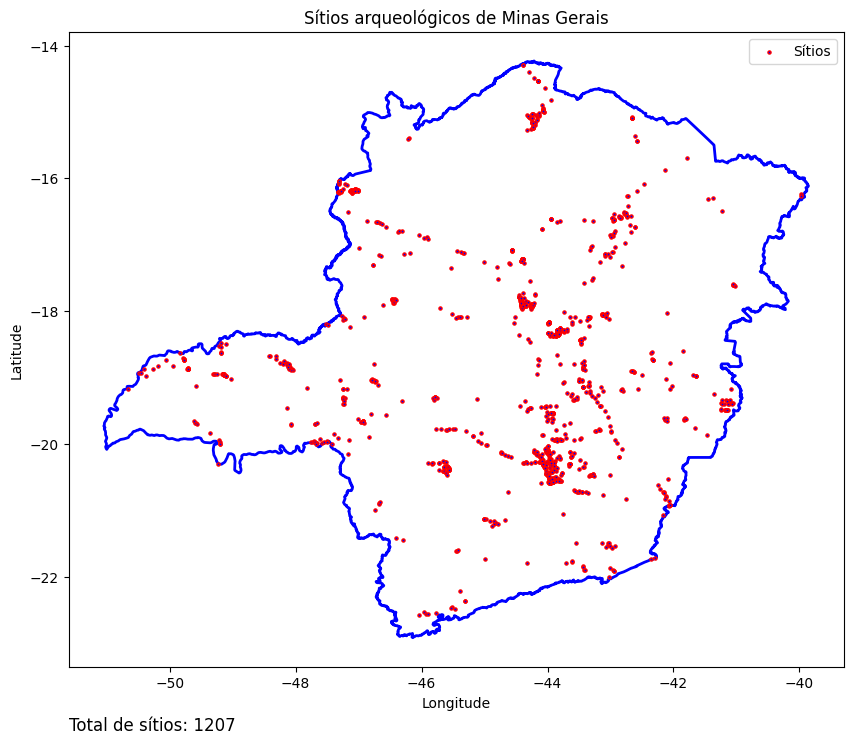

In [27]:
# Load the archaeological sites GeoDataFrame
shapefile_path = 'MG_sitios_arqueologicos.shp'
gdf = gpd.read_file(shapefile_path)

# Load the state boundaries GeoDataFrame
estado_shapefile_path = 'estados_2010.shp'
estado_boundaries_gdf = gpd.read_file(estado_shapefile_path)
mapa_minas = estado_boundaries_gdf[estado_boundaries_gdf['sigla'] == 'MG']

# Plot both maps on the same figure
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the state boundaries with blue border and no fill
mapa_minas.plot(ax=ax, edgecolor='blue', facecolor='none', linewidth=2, label='Minas Gerais')

# Plot the archaeological sites with smaller blue dots and red borders
gdf.plot(ax=ax, marker='o', color='blue', edgecolor='red', markersize=5, label='Sítios')

# Add text annotation for the total number of archaeological sites
total_sites = len(gdf)
annotation_text = f'Total de sítios: {total_sites}'
ax.annotate(annotation_text, xy=(0.00, -0.10), xycoords='axes fraction', ha='left', fontsize=12)

# Set labels and title
plt.title('Sítios arqueológicos de Minas Gerais')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [7]:
print(gdf.head(5))


      cnsa                                      nome   município  uf  \
0  MG02958                     Abrigo Poço do Tatu 1  Diamantina  MG   
1  MG02960                           Serra do Tatu 1  Diamantina  MG   
2  MG02961                           Serra do Tatu 2  Diamantina  MG   
3  MG02962  Sítio Estrada (Atualização CNSA MG01433)  Diamantina  MG   
4  MG02963                       Lapa dos Alforges 1  Diamantina  MG   

                                          descr_suma          categoria  \
0  Sítio Arqueológico Multicomponencial, contendo...  multicomponencial   
1  Sítio Arqueológico Pré-Histórico contendo pint...    unicomponencial   
2  Sítio Arqueológico Multicomponencial contendo ...  multicomponencial   
3  O sítio esta loclaizado em um abrigo rochoso l...  multicomponencial   
4  Implantado em baixa vertente o sítio está loca...    unicomponencial   

               classifica           tipo exposicao  \
0  Pré-colonial,Histórico  Arte rupestre    abrigo   
1       

In [8]:
print(sorted(gdf['município'].unique()))

['Abadia dos Dourados', 'Aimorés', 'Alpercata', 'Alvorada de Minas', 'Andrelândia', 'Araguari', 'Araporã', 'Araxá', 'Araújos', 'Arcos', 'Augusto de Lima', 'Açucena', 'Barão de Cocais', 'Bela Vista de Minas', 'Belmiro Braga', 'Belo Horizonte', 'Belo Vale', 'Berizal', 'Bocaiúva', 'Bom Despacho', 'Bonfim', 'Botumirim', 'Brasilândia de Minas', 'Brumadinho', 'Buenópolis', 'Buritizeiro', 'Cabeceira Grande', 'Cabo Verde', 'Caetanópolis', 'Caeté', 'Cambuí', 'Carangola', 'Caratinga', 'Carlos Chagas', 'Carmo do Cajuru', 'Catas Altas da Noruega', 'Centralina', 'Chiador', 'Coimbra', 'Conceição do Mato Dentro', 'Confins', 'Congonhas', 'Congonhas do Norte', 'Conquista', 'Conselheiro Lafaiete', 'Consolação', 'Contagem', 'Corinto', 'Coroaci', 'Coromandel', 'Couto de Magalhães de Minas', 'Cristália', 'Curvelo', 'Diamantina', 'Divino', 'Divinópolis', 'Dom Bosco', 'Doresópolis', 'Engenheiro Caldas', 'Entre Rios de Minas', 'Eugenópolis', 'Faria Lemos', 'Ferros', 'Formiga', 'Formoso', 'Fortaleza de Minas',

<ipython-input-9-a216eb5874e3>:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(alto_paranaiba_gdf.geometry.centroid.x, alto_paranaiba_gdf.geometry.centroid.y, alto_paranaiba_gdf['NOME']):
<ipython-input-9-a216eb5874e3>:22: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(noroeste_mineiro_gdf.geometry.centroid.x, noroeste_mineiro_gdf.geometry.centroid.y, noroeste_mineiro_gdf['NOME']):
<ipython-input-9-a216eb5874e3>:28: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


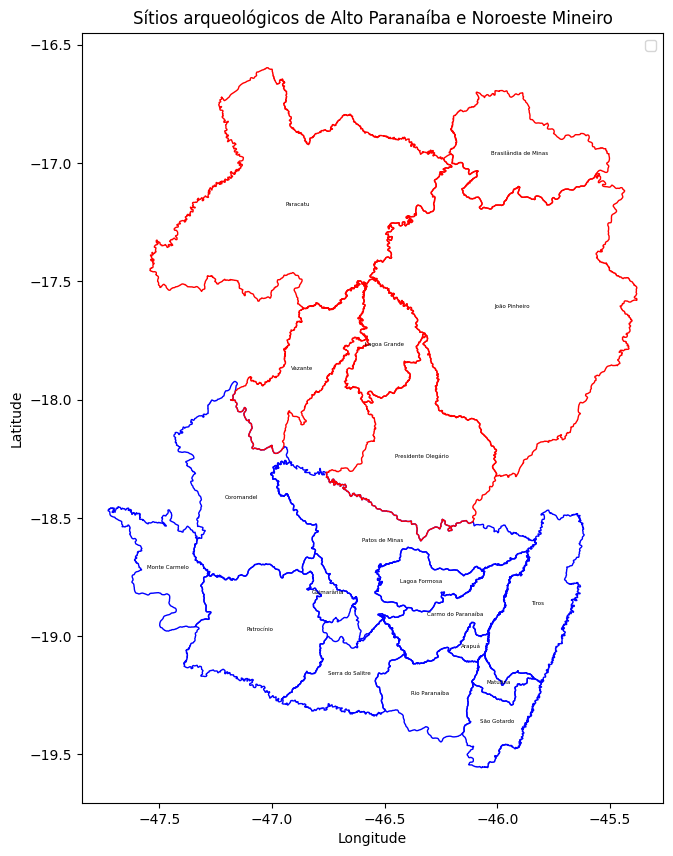

In [9]:
# Define corrected set of Alto Paranaíba municipalities
alto_paranaiba_municipios = ['Tiros', 'Matutina','Rio Paranaíba', 'Arapuá','Serra do Salitre', 'Patos de Minas', 'Guimarânia', 'Patrocínio', 'Monte Carmelo', 'São Gotardo', 'Carmo do Paranaíba', 'Coromandel', 'Lagoa Formosa']

noroeste_mineiro_municipios = ['Presidente Olegário', 'Brasilândia de Minas', 'Guarda Mor', 'João Pinheiro', 'Lagoa Grande', 'Paracatu', 'Vazante']


# Filter GeoDataFrame for corrected Alto Paranaíba municipalities
alto_paranaiba_gdf = boundaries_gdf[boundaries_gdf['NOME'].isin(alto_paranaiba_municipios)]

# Filter GeoDataFrame for Noroeste Mineiro municipalities
noroeste_mineiro_gdf = boundaries_gdf[boundaries_gdf['NOME'].isin(noroeste_mineiro_municipios)]

# Plot map for both Alto Paranaíba and Noroeste Mineiro with labeled municipalities
fig, ax = plt.subplots(figsize=(10, 10))
alto_paranaiba_gdf.plot(ax=ax, edgecolor='blue', facecolor='none', label='Alto Paranaíba')
noroeste_mineiro_gdf.plot(ax=ax, edgecolor='red', facecolor='none', label='Noroeste Mineiro')

# Add labels for municipalities
for x, y, label in zip(alto_paranaiba_gdf.geometry.centroid.x, alto_paranaiba_gdf.geometry.centroid.y, alto_paranaiba_gdf['NOME']):
    ax.text(x, y, label, fontsize=4, ha='center', va='center')

for x, y, label in zip(noroeste_mineiro_gdf.geometry.centroid.x, noroeste_mineiro_gdf.geometry.centroid.y, noroeste_mineiro_gdf['NOME']):
    ax.text(x, y, label, fontsize=4, ha='center', va='center')

plt.title('Sítios arqueológicos de Alto Paranaíba e Noroeste Mineiro')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

<ipython-input-10-26da81b0d815>:27: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(alto_paranaiba_gdf.geometry.centroid.x, alto_paranaiba_gdf.geometry.centroid.y, alto_paranaiba_gdf['NOME']):
<ipython-input-10-26da81b0d815>:31: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(noroeste_mineiro_gdf.geometry.centroid.x, noroeste_mineiro_gdf.geometry.centroid.y, noroeste_mineiro_gdf['NOME']):
<ipython-input-10-26da81b0d815>:35: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


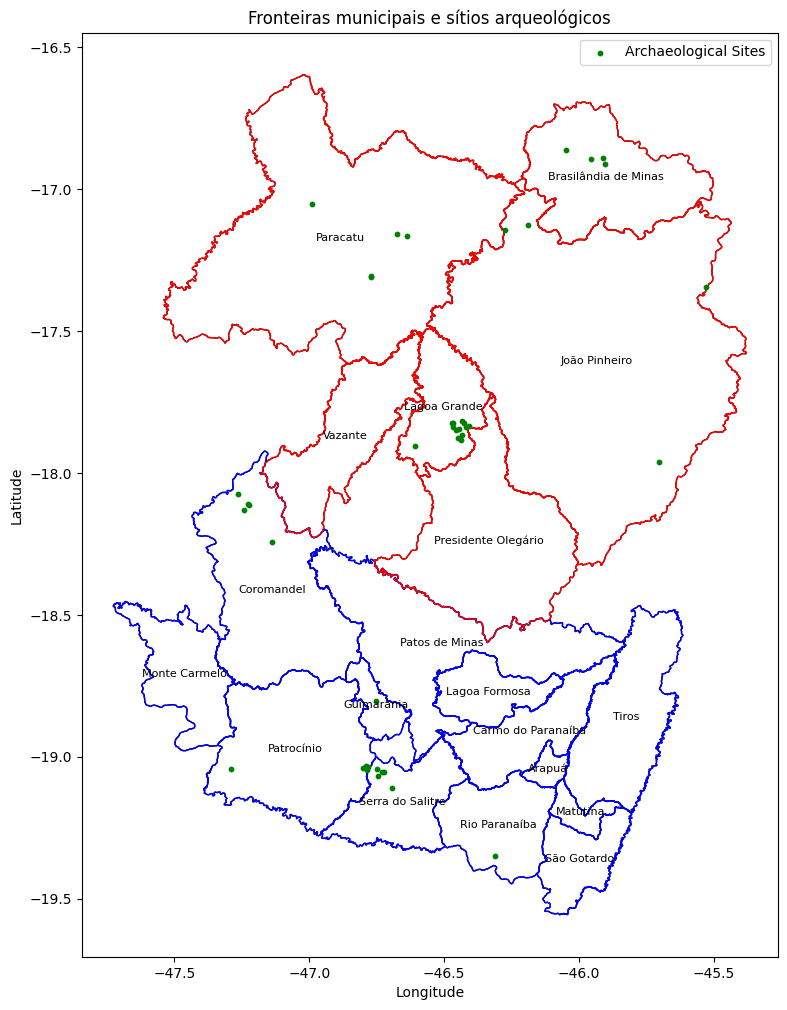

In [10]:
# Define corrected set of Alto Paranaíba municipalities
alto_paranaiba_municipios = ['Tiros', 'Matutina','Rio Paranaíba', 'Arapuá','Serra do Salitre', 'Patos de Minas', 'Guimarânia', 'Patrocínio', 'Monte Carmelo', 'São Gotardo', 'Carmo do Paranaíba', 'Coromandel', 'Lagoa Formosa']

# Define corrected set of Noroeste Mineiro municipalities
noroeste_mineiro_municipios = ['Presidente Olegário', 'Brasilândia de Minas', 'Guarda Mor', 'João Pinheiro', 'Lagoa Grande', 'Paracatu', 'Vazante']

# Filter GeoDataFrame for corrected Alto Paranaíba municipalities
alto_paranaiba_gdf = boundaries_gdf[boundaries_gdf['NOME'].isin(alto_paranaiba_municipios)]

# Filter GeoDataFrame for corrected Noroeste Mineiro municipalities
noroeste_mineiro_gdf = boundaries_gdf[boundaries_gdf['NOME'].isin(noroeste_mineiro_municipios)]

# List of target municipalities for archaeological sites
target_municipios = alto_paranaiba_municipios + noroeste_mineiro_municipios

# Filter archaeological sites data for the specified municipalities
filtered_sites = gdf[gdf['município'].isin(target_municipios)]

# Plot the combined map with archaeological sites
fig, ax = plt.subplots(figsize=(12, 12))
boundaries_gdf[boundaries_gdf['NOME'].isin(target_municipios)].plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1, label='Municipal Boundaries')
alto_paranaiba_gdf.plot(ax=ax, color='none', edgecolor='blue', label='Alto Paranaíba Municipalities')
noroeste_mineiro_gdf.plot(ax=ax, color='none', edgecolor='red', label='Noroeste Mineiro Municipalities')
filtered_sites.plot(ax=ax, color='green', markersize=10, label='Archaeological Sites')

# Add labels for Alto Paranaíba municipalities
for x, y, label in zip(alto_paranaiba_gdf.geometry.centroid.x, alto_paranaiba_gdf.geometry.centroid.y, alto_paranaiba_gdf['NOME']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center')

# Add labels for Noroeste Mineiro municipalities
for x, y, label in zip(noroeste_mineiro_gdf.geometry.centroid.x, noroeste_mineiro_gdf.geometry.centroid.y, noroeste_mineiro_gdf['NOME']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center')

# Add legend
ax.legend()

plt.title('Fronteiras municipais e sítios arqueológicos')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [11]:
shapefile_path = 'sitios.shp'
iphan_df = gpd.read_file(shapefile_path, encoding='ISO-8859-1')

ERROR:fiona._env:fread(2585) failed on DBF file.


In [12]:
!pip install dbfread

In [13]:
from dbfread import DBF

# Caminho para o arquivo DBF
dbf_path = 'sitios.dbf'  # Substitua pelo caminho real do seu arquivo DBF

# Usar dbfread para carregar o DBF
dbf_table = DBF(dbf_path, encoding='ISO-8859-1')
dbf_df = pd.DataFrame(iter(dbf_table))

# Carregar o shapefile usando GeoPandas
iphan_df = gpd.read_file(shapefile_path)

# Adicionar as colunas do DBF ao GeoDataFrame
iphan_df = iphan_df.merge(dbf_df, left_index=True, right_index=True)

# Exibir as primeiras linhas do GeoDataFrame
print(iphan_df.head())

ERROR:fiona._env:fread(2585) failed on DBF file.


   id_bem_x               identifica_x          co_iphan_x no_logrado_x  \
0     40914  Capela da Fazenda Surubím  BA2909901BAST00014         None   
1     43377        Salto dos Alemães I  PR4117305BAST00116         None   
2     43378       Salto dos Alemães II  PR4117305BAST00117         None   
3     44430                Laranjeiras  BA2929503BAST00005         None   
4     39814          Nova Batalhinha I  BA2903904BAST00007         None   

  nu_logrado_x  id_naturez_x      ds_naturez_x codigo_iph_x  id_classif_x  \
0         None             3  Bem Arqueológico           BA            40   
1         None             3  Bem Arqueológico           BA            41   
2         None             3  Bem Arqueológico           BA            41   
3         None             3  Bem Arqueológico           BA            40   
4         None             3  Bem Arqueológico           BA            41   

   ds_classif_x  ...  id_naturez_y      ds_naturez_y codigo_iph_y  \
0     Histórico  

In [14]:
print(iphan_df.columns)

Index(['id_bem_x', 'identifica_x', 'co_iphan_x', 'no_logrado_x',
       'nu_logrado_x', 'id_naturez_x', 'ds_naturez_x', 'codigo_iph_x',
       'id_classif_x', 'ds_classif_x', 'id_tipo_be_x', 'ds_tipo_be_x',
       'sg_tipo_be_x', 'sintese_be_x', 'dt_cadastr_x', 'geometry', 'id_bem_y',
       'identifica_y', 'co_iphan_y', 'no_logrado_y', 'nu_logrado_y',
       'id_naturez_y', 'ds_naturez_y', 'codigo_iph_y', 'id_classif_y',
       'ds_classif_y', 'id_tipo_be_y', 'ds_tipo_be_y', 'sg_tipo_be_y',
       'sintese_be_y', 'dt_cadastr_y'],
      dtype='object')


ERROR:fiona._env:fread(2585) failed on DBF file.


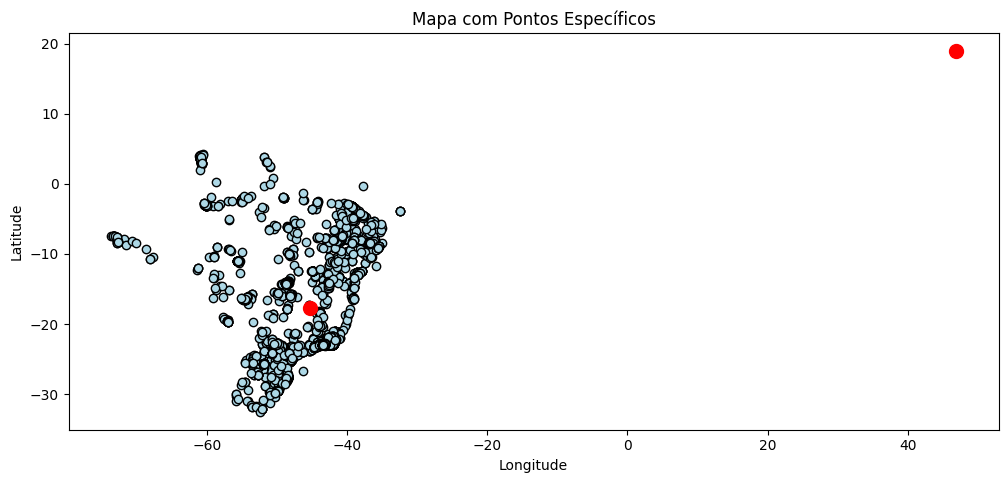

In [15]:
def plot_map_with_points(file_name, latitudes, longitudes):
    # Carregar o GeoDataFrame
    gdf = gpd.read_file(file_name, encoding='ISO-8859-1')

    # Criar geometrias a partir das coordenadas
    geometry_points = [Point(lon, lat) for lat, lon in zip(latitudes, longitudes)]
    gdf_points = gpd.GeoDataFrame(geometry=geometry_points, crs='EPSG:4326')

    # Plotar o mapa
    fig, ax = plt.subplots(figsize=(12, 10))

    # Plotar o GeoDataFrame original
    gdf.plot(ax=ax, color='lightblue', edgecolor='black')

    # Plotar os pontos
    gdf_points.plot(ax=ax, marker='o', color='red', markersize=100)

    # Adicionar rótulo e título
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Mapa com Pontos Específicos')

    # Exibir o mapa
    plt.show()

# Exemplo de uso
file_name = 'sitios.shp'
latitudes = [-17.65, 18.98]  # Substitua com os valores reais
longitudes = [-45.25, 46.91]  # Substitua com os valores reais

plot_map_with_points(file_name, latitudes, longitudes)

In [16]:
# Manter apenas as colunas relacionadas à geometria no DataFrame original
iphan_geo_df = iphan_df[['geometry']].copy()

# Exibir as primeiras linhas do DataFrame resultante
print(iphan_geo_df.head())
print(len(iphan_geo_df))

                      geometry
0   POINT (-39.84047 -9.58850)
1  POINT (-50.71269 -24.17861)
2  POINT (-50.70568 -24.17688)
3  POINT (-38.54528 -12.56523)
4  POINT (-43.47783 -13.66485)
2433


In [17]:
filtered_latitude = (iphan_df['geometry'].x < -45.) & (iphan_df['geometry'].x >= -47.)
print(filtered_latitude.sum())
filtered_longitude = (iphan_df['geometry'].y <= -18.) & (iphan_df['geometry'].y >= -19.)
print(filtered_longitude.sum())

54
40


In [18]:
filtered_gdf_points = iphan_df[
        (iphan_df['geometry'].x < -44.) & (iphan_df['geometry'].x >= -48.) &
        (iphan_df['geometry'].y <= -17.) & (iphan_df['geometry'].y >= -20.)
    ]
print(filtered_gdf_points)

      id_bem_x                     identifica_x          co_iphan_x  \
23       27726                      Lagoinha 01  MG3109402BAST00006   
62       33211  Estação Ferroviária de Rodeador  MG3142502BAST00003   
77       27728                      Lagoinha 02  MG3109402BAST00007   
923      23749  Complexo Ferroviário de Corinto  MG3119104BAST00004   
946      34434                       Outro Lado  MG3149309BAST00010   
1967     34536                  Capão Grande B2  MG3167202BAST00008   

     no_logrado_x nu_logrado_x  id_naturez_x      ds_naturez_x codigo_iph_x  \
23              -         None             3  Bem Arqueológico           BA   
62           None         None             3  Bem Arqueológico           BA   
77              -         None             3  Bem Arqueológico           BA   
923             -         None             3  Bem Arqueológico           BA   
946          None         None             3  Bem Arqueológico           BA   
1967         None         No

ERROR:fiona._env:fread(2585) failed on DBF file.


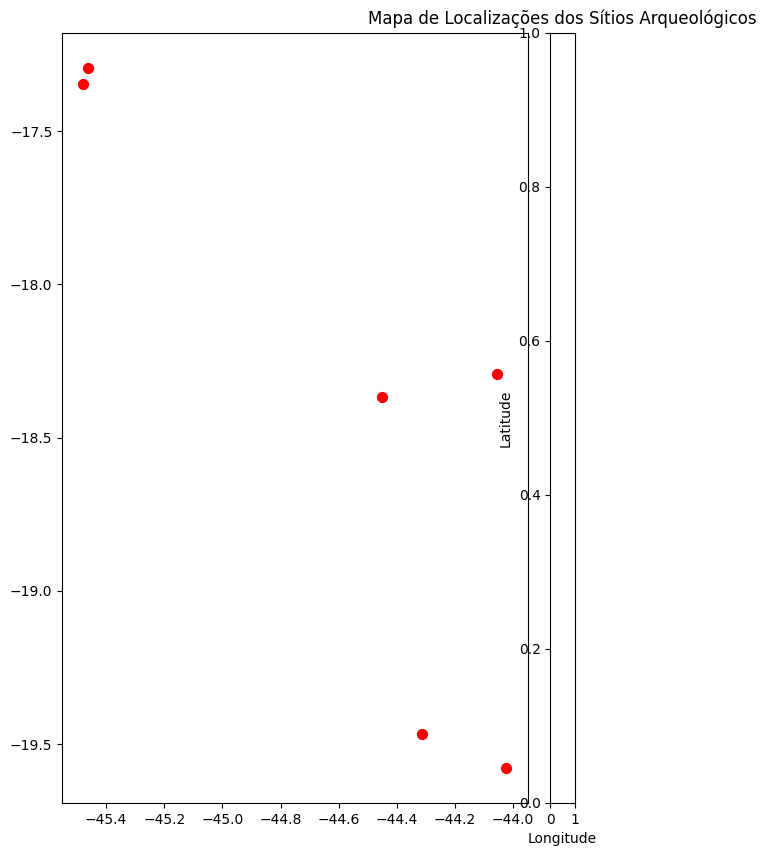

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Carregar o GeoDataFrame novamente para garantir que não haja modificações acidentais
iphan_geo_df = gpd.read_file('sitios.shp', encoding='ISO-8859-1')

# Usar projeção Mercator para melhor visualização de pontos geográficos
iphan_geo_df = iphan_geo_df.to_crs(epsg=3395)  # Código EPSG para a projeção Mercator

# Plotar o GeoDataFrame com mais detalhes
fig, ax = plt.subplots(figsize=(12, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
filtered_gdf_points.plot(ax=ax, marker='o', color='red', markersize=50, legend=True, cax=cax)

# Adicionar rótulo e título
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mapa de Localizações dos Sítios Arqueológicos')

# Adicionar escala de cores ao lado do mapa
plt.show()

Total de locais: 6


<ipython-input-20-6c70c89f6ede>:27: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(alto_paranaiba_gdf.geometry.centroid.x, alto_paranaiba_gdf.geometry.centroid.y, alto_paranaiba_gdf['NOME']):
<ipython-input-20-6c70c89f6ede>:31: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(noroeste_mineiro_gdf.geometry.centroid.x, noroeste_mineiro_gdf.geometry.centroid.y, noroeste_mineiro_gdf['NOME']):
<ipython-input-20-6c70c89f6ede>:35: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


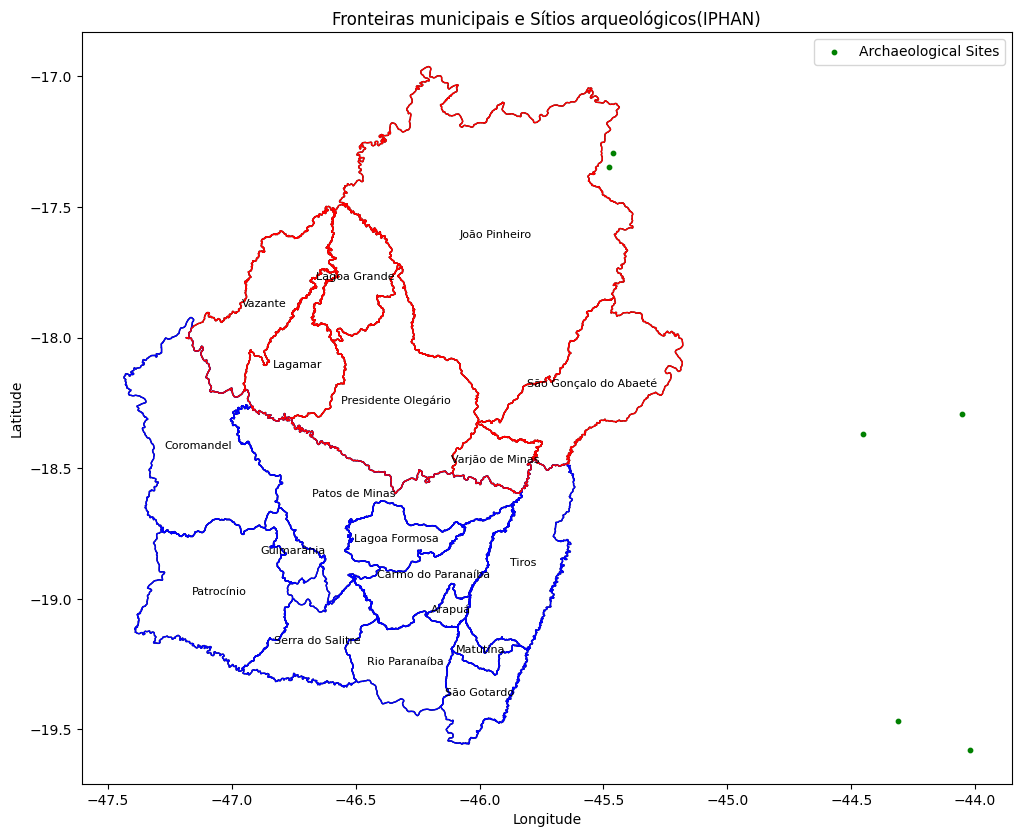

In [20]:
# Define corrected set of Alto Paranaíba municipalities
alto_paranaiba_municipios = ['Tiros', 'Matutina','Rio Paranaíba', 'Arapuá','Serra do Salitre', 'Patos de Minas', 'Guimarânia', 'Patrocínio', 'São Gotardo', 'Carmo do Paranaíba', 'Coromandel', 'Lagoa Formosa']

# Define corrected set of Noroeste Mineiro municipalities
noroeste_mineiro_municipios = ['Lagamar', 'São Gonçalo do Abaeté', 'Varjão de Minas', 'Presidente Olegário', 'Guarda Mor', 'João Pinheiro', 'Lagoa Grande', 'Vazante']

# Filter GeoDataFrame for corrected Alto Paranaíba municipalities
alto_paranaiba_gdf = boundaries_gdf[boundaries_gdf['NOME'].isin(alto_paranaiba_municipios)]

# Filter GeoDataFrame for corrected Noroeste Mineiro municipalities
noroeste_mineiro_gdf = boundaries_gdf[boundaries_gdf['NOME'].isin(noroeste_mineiro_municipios)]

# List of target municipalities for archaeological sites
target_municipios = alto_paranaiba_municipios + noroeste_mineiro_municipios

# Filter archaeological sites data for the specified municipalities
filtered_sites = filtered_gdf_points
print(f"Total de locais: {len(filtered_sites)}")
# Plot the combined map with archaeological sites
fig, ax = plt.subplots(figsize=(12, 12))
boundaries_gdf[boundaries_gdf['NOME'].isin(target_municipios)].plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1, label='Municipal Boundaries')
alto_paranaiba_gdf.plot(ax=ax, color='none', edgecolor='blue', label='Alto Paranaíba Municipalities')
noroeste_mineiro_gdf.plot(ax=ax, color='none', edgecolor='red', label='Noroeste Mineiro Municipalities')
filtered_sites.plot(ax=ax, color='green', markersize=10, label='Archaeological Sites')

# Add labels for Alto Paranaíba municipalities
for x, y, label in zip(alto_paranaiba_gdf.geometry.centroid.x, alto_paranaiba_gdf.geometry.centroid.y, alto_paranaiba_gdf['NOME']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center')

# Add labels for Noroeste Mineiro municipalities
for x, y, label in zip(noroeste_mineiro_gdf.geometry.centroid.x, noroeste_mineiro_gdf.geometry.centroid.y, noroeste_mineiro_gdf['NOME']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center')

# Add legend
ax.legend()

plt.title('Fronteiras municipais e Sítios arqueológicos(IPHAN)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [21]:
print("DataFrame 1 CRS:", gdf.crs)


DataFrame 1 CRS: EPSG:4326


-tentar adicionar fronteiras noroeste e alto paranaiba so regioes
-entorno de p.o. mais lagora formosa e guimarania
